In [16]:
# Step 1: Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms, datasets

import matplotlib.pyplot as plt

In [ ]:
# Step 2: Load and preprocess the dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to a consistent size
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize image data
])

In [ ]:
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [13]:
# Get a random sample from the dataset
sample, label = next(iter(test_loader))

In [15]:
# Convert the tensor to a NumPy array
image = sample[0].numpy()

# Convert the tensor label to a human-readable label
label = test_dataset.classes[label[0].item()]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


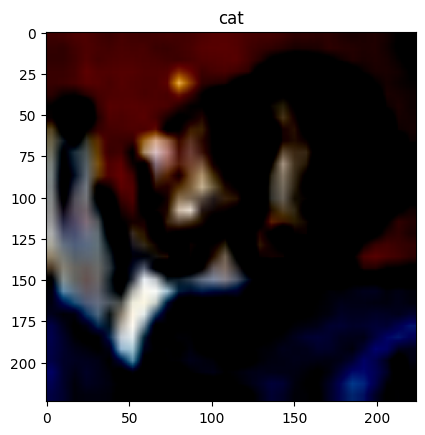

In [18]:
# Visualize the sample image
plt.imshow(image.transpose(1, 2, 0))
plt.title(label)
# plt.axis('off')
plt.show()

In [ ]:
# Step 3: Define the CNN architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc = nn.Linear(32 * 56 * 56, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [ ]:
# Step 4: Instantiate the CNN model and define loss function and optimizer
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# Step 5: Train the model
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

In [ ]:
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if (i+1) % 100 == 0:
            print(f"Epoch: {epoch+1}, Step: {i+1}, Loss: {running_loss/100:.4f}")
            running_loss = 0.0

In [ ]:
# Step 6: Evaluate the model on the test set
model.eval()
correct = 0
total = 0

In [ ]:
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

In [ ]:
accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")